In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
zero_one_colourmap = ListedColormap(('red', 'green'))

# Plotting Decision Boundary Function

In [4]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

# Plotting 3D Plot

In [5]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

# Reading the Data

In [6]:
df = pd.read_csv("Overview.csv")

In [7]:
df.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0,0,0,37,0,0,0
1,2019-06-25T13:09,0,0,0,37,0,0,0
2,2019-06-27T10:49,0,0,0,38,0,0,0
3,2019-06-27T10:51,0,0,0,38,0,0,0
4,2019-06-27T10:52,0,0,0,39,0,0,0


In [8]:
df.drop('DeviceTimeStamp', axis=1, inplace = True) ## set axis = 0 to remove rows, axis = 1 to remove colums
df.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,0,0,0,37,0,0,0
1,0,0,0,37,0,0,0
2,0,0,0,38,0,0,0
3,0,0,0,38,0,0,0
4,0,0,0,39,0,0,0


In [9]:
#X = df.drop('OTI_T', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy
#X.head()

In [10]:
#y = df['OTI_T'].copy()
#y.head()

In [11]:
X = df.loc[:, ["OTI", "ATI"]].values
y = df.loc[:, "OTI_T"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 4)

# Linear Classifier

In [13]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

# Accuracy score for SVM linear kernels

In [26]:
print('Accuracy score for svm linear kernel:', 100*accuracy_score(y_test, y_pred))

Accuracy score for svm linear kernel: 100.0


In [28]:
confusion_matrix(y_test, y_pred)

array([[6082,    0],
       [   0,   13]], dtype=int64)

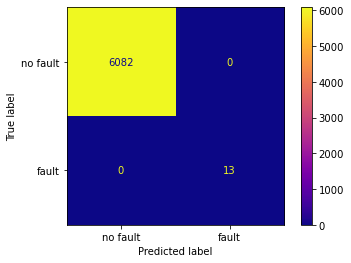

In [16]:
plot_confusion_matrix(classifier, X_test, y_test, cmap="plasma", display_labels=["no fault", "fault"])

In [29]:
# def compute_accuracy(tp, tn, fn, fp) ### for computting accuracy score manually.
"""
Accuracy = TP + TN / FP + FN + TP + TN
"""
# return((tn + tp) * 100)/float(tp + tn + fn + fp)

'\nAccuracy = TP + TN / FP + FN + TP + TN\n'

In [31]:
# def compute_precision(tp, fp):
'''
precision = TP / FP + TP
'''
# return(tp * 100)/float(tp + fp)
# print("precision:", compute_precision(tp, fp))

'\nprecision = TP / FP + TP\n'

# Precision score for SVM Linear kernels 

In [32]:
from sklearn.metrics import precision_score
print("precision score for SVM linear kernel:", 100*precision_score(y_test, y_pred))

precision score for SVM linear kernel: 100.0


# Recall for SVM linear kernels

In [33]:
# def compute_recall(tp, fn):
'''
Recall = TP / FN + TP
'''
# return(tp * 100)/float(tp + fn)
# print("recall:", compute_recall(tp, fn))

'\nRecall = TP / FN + TP\n'

In [34]:
from sklearn.metrics import recall_score
print('Recall for SVM linear kernels:', 100 * recall_score(y_test, y_pred))

Recall for SVM linear kernels: 100.0


# F1-score

In [35]:
# compute_f1_score(y_test, y_pred) # for manual computation
"""
tp, tn, fp, fn = compute_tp_tn_fn_fp(y_test, y_pred)
precision = compute_precision(tp, fp)/100
recall = compute_recall(tp, fn)/100
f1_score = (2*precision*recall)/(precision + recall)
return f1_score"""

'\ntp, tn, fp, fn = compute_tp_tn_fn_fp(y_test, y_pred)\nprecision = compute_precision(tp, fp)/100\nrecall = compute_recall(tp, fn)/100\nf1_score = (2*precision*recall)/(precision + recall)\nreturn f1_score'

In [36]:
# print('F1 score:', compute_f1_score(y_test, y_pred))

In [38]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_test, y_pred))

F1 score: 1.0


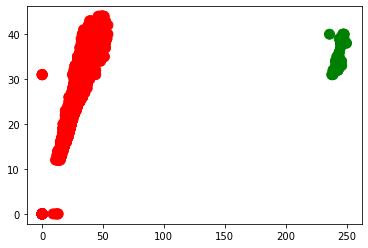

In [39]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap = zero_one_colourmap)
plt.show()

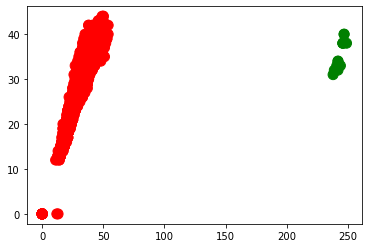

In [40]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, s=100, cmap = zero_one_colourmap)
plt.show()

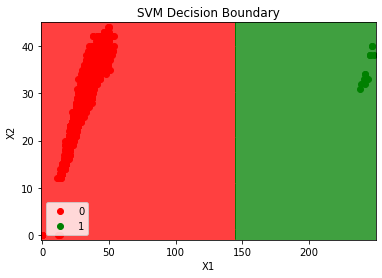

In [41]:
plot_decision_boundary(X_test, y_test, classifier)

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

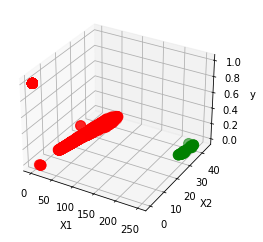

In [42]:
plot_3d_plot(X, y)

# Non Linear SVM Classifier

In [43]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train.ravel())
y_pred = rbf_classifier.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

1.0

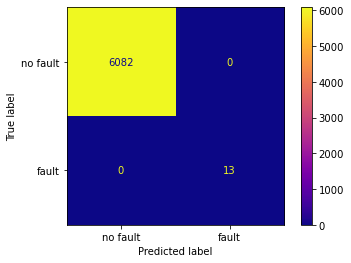

In [45]:
plot_confusion_matrix(rbf_classifier, X_test, y_test, cmap="plasma", display_labels=["no fault", "fault"])

In [47]:
from sklearn.metrics import precision_score
print("precision score for SVM RBF kernel:", 100*precision_score(y_test, y_pred))

precision score for SVM RBF kernel: 100.0


In [48]:
from sklearn.metrics import recall_score
print('Recall for SVM RBF kernels:', 100 * recall_score(y_test, y_pred))

Recall for SVM RBF kernels: 100.0


In [ ]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_test, y_pred))

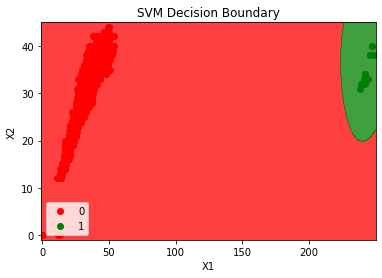

In [46]:
plot_decision_boundary(X_test, y_test, rbf_classifier)